# LOGISTIC REGRESSION

**Input:** 

Training set contain m data point which is represented by a matrix **X** with m column and each column is one data point with n features.

$$ 
X = \begin{bmatrix}
x^{(1)}_1 \space \space \space x^{(2)}_1 \space \space \space x^{(3)}_1 \space \space \space ... \space \space \space x^{(m)}_1 \\
x^{(1)}_2 \space \space \space x^{(2)}_2 \space \space \space x^{(3)}_2 \space \space \space ... \space \space \space x^{(m)}_2 \\
\vdots \\
x^{(1)}_n \space \space \space x^{(2)}_n \space \space \space x^{(3)}_n \space \space \space ... \space \space \space x^{(m)}_n \\
\end{bmatrix}
$$

**Model: **
$$ \hat{Y} = \frac{1}{1 + e^{-Z}} = \frac{1}{1 + e^{-(W X + b)}}$$

$$ Z = W X + b$$

** With: **

$$ 
Y = \begin{bmatrix}
y^{(1)} \space \space \space x^{(2)} \space \space \space x^{(3)} \space \space \space ... \space \space \space y^{(m)}
\end{bmatrix}
$$

$$ 
W = \begin{bmatrix}
w_{1} \space \space w_{2} \space \space w_{3} \space \space ... \space \space w_{n}
\end{bmatrix}
$$


**Loss function: **
$$ \mathcal{L} (a) = \frac{1}{m} \sum ^{m} _{i=1} - Y * log(\hat{Y}) - (1 - Y) * log(1 - \hat{Y}) $$

**Loss function derivative (gradient, slope): **
$$ \mathcal{L}' (W) = \frac{\partial \mathcal{L}}{\partial W} = \frac{1}{m} (\hat{Y} - Y) X^T $$ 
$$ \mathcal{L}' (b) = \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum ^{m} _{i=1} (\hat{Y} - Y) $$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class model_1():
    
    def __init__(self,
                 X_train,
                 Y_train,
                 num_step = 10000,
                 lr = 0.1):
        self.X_train = X_train
        self.Y_train = Y_train
        self.num_step = num_step
        self.lr = lr
        
    def initialize(self):
        self.W = np.random.rand(self.X_train.shape[0], 1)
        self.b = 0
        
    # Prediction of datas point
    # X : matrix (n x m)
    def logit(self,X):
        z = np.dot(self.W, X) + self.b
        return z
        
    # Prediction of datas point
    # X : matrix (n x m)
    def predict(self,X):
        z = self.logit(X)
        Y_hat = 1 / (1 + np.e**(-z))
        return Y_hat

    def grad(self):
        m = self.Y_train.shape[1] * 1.0
        Y_hat = self.predict(self.X_train)
        dW = 1 / m * np.dot((Y_hat - self.Y_train), np.transpose(self.X_train))
        db = 1 / m * np.sum(Y_hat - self.Y_train) 
        return {"dW":dW, "db" : db}

    def loss(self):
        m = self.Y_train.shape[1] * 1.0
        Y_hat = self.predict(self.X_train) 
        cost = - self.Y_train * np.log(Y_hat) - (1 - self.Y_train) * np.log(1 - Y_hat)
        cost = np.sum(cost)
        return 1/m * cost

    def train(self):
        self.initialize()
        self.losses = []
        for i in range(self.num_step):
            gradient = self.grad()
            self.W = self.W - self.lr * gradient["dW"]
            self.b = self.b - self.lr * gradient["db"]
            self.losses.append(self.loss())

            if i%5000==0:
                print("At step " + str(i) + " " + str(self.losses[-1]))

        print("W :" + str(self.W))
        print("b :" + str(self.b))

In [0]:
def genData():
    center1 = np.array([4,4])
    center2 = np.array([8,10])
    
    m1 = 100
    m2 = 100
    
    # Generate data for center 1
    X1 = center1 + np.random.rand(m1, center1.shape[0])*3
    Y1 = np.zeros(m1)
    
    # Generate data for center 2
    X2 = center2 + np.random.rand(m2, center2.shape[0])*3
    Y2 = np.ones(m2)
    
    X3 = center1 + np.random.rand(50, center1.shape[0])*6
    Y3 = np.random.rand(50) > 0.5 

    X = np.concatenate((X1, X2), axis=0)
    Y = np.concatenate((Y1, Y2), axis=0)

    X = np.concatenate((X, X3), axis=0)
    Y = np.concatenate((Y, Y3), axis=0)
    
    Y = Y.reshape(1, Y.shape[0])
    
    return np.transpose(X),Y,np.transpose(X1),np.transpose(X2)

In [4]:
X, Y, X1, X2 = genData()
model = model_1(X_train = X,Y_train = Y, num_step = 50000, lr = 0.003)
model.train()


At step 0 3.8560049642053666
At step 5000 0.4683793487671174
At step 10000 0.400743073933357
At step 15000 0.3565741752275874
At step 20000 0.32648862884071045
At step 25000 0.3051663458868333
At step 30000 0.2895248757542971
At step 35000 0.2777121029838008
At step 40000 0.268570621529486
At step 45000 0.2613497996894153
W :[[0.31813143 0.55055118]]
b :-6.33816097354716


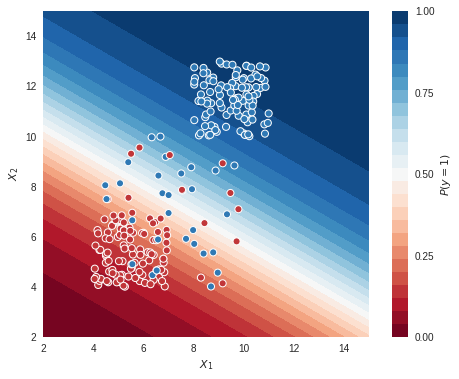

In [6]:
# np.mgrid : Return grid point contain 2:15 x 2:15, with each point is represented by 2 feature -> return tensor 2 x 2:15 x 2:15 
X1_grid, X2_grid = np.mgrid[2:15:.01, 2:15:.01] 

# np.ravel : flatten tensor
grid = np.c_[X1_grid.ravel(), X2_grid.ravel()]
probs = model.predict(np.transpose(grid))
probs = probs.reshape(X1_grid.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X1_grid, X2_grid, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[0,:], X[1,:], c=Y.reshape(Y.shape[1])[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(2, 15), ylim=(2, 15),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()